# 詞向量訓練教學
- https://github.com/zake7749/word2vec-tutorial

### 斷詞
- jieba
- pynlpir(未用)

In [2]:
from gensim.models import word2vec
import jieba

In [ ]:
def segWords():
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    # jieba custom setting.
    jieba.set_dictionary('jieba_dict/dict.txt.big')

    # load stopwords set
    stopword_set = set()
    with open('jieba_dict/stopwords.txt','r', encoding='utf-8') as stopwords:
        for stopword in stopwords:
            stopword_set.add(stopword.strip('\n'))

    output = open('data/case_seg.txt', 'w', encoding='utf-8')
    with open('data/case.csv', 'r', encoding='utf-8') as content :
        for texts_num, line in enumerate(content):
            line = line.strip('\n')
            words = jieba.cut(line, cut_all=False)
            for word in words:
                if word not in stopword_set:
                    output.write(word + ' ')
            output.write('\n')

            if (texts_num + 1) % 10000 == 0:
                logging.info("已完成前 %d 行的斷詞" % (texts_num + 1))
    output.close()

訓練詞向量

In [1]:
def trainModel():

    #logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    sentences = word2vec.LineSentence("data/case_seg.txt")
    model = word2vec.Word2Vec(sentences, size=300, window=100)

    #保存模型，供日後使用
    model.save("models/case_word2vec_w100.model")

    #模型讀取方式
    # model = word2vec.Word2Vec.load("your_model_name")

In [3]:
#segWords()  
#trainModel()
model = word2vec.Word2Vec.load("models/case_word2vec_w20.model")

In [19]:
model.wv['']

NameError: name 'model' is not defined

In [3]:
print("相似詞前30排序")
query_term = "发热"
res = model.most_similar(query_term,topn = 30)
for item in res:
    print(item[0]+","+str(item[1]))

相似詞前30排序
高热,0.9267770051956177
恶寒,0.8653234839439392
咽痛,0.8498842120170593
喷嚏,0.8479686379432678
鼻塞,0.845749020576477
寒战,0.8380828499794006
流涕,0.8358491659164429
身热,0.8290133476257324
高烧,0.8149915337562561
发烧,0.8121747374534607
无汗,0.8100581765174866
感身,0.7996008992195129
身痛,0.7902915477752686
T38,0.7860594987869263
上感,0.7769319415092468
鼻流,0.7666131854057312
低热,0.7645227313041687
阵,0.7607751488685608
肛温,0.7605944871902466
突然,0.7597153782844543
带血,0.753117024898529
往来,0.7484055757522583
咯痰,0.7480448484420776
连连,0.7472888231277466
清涕,0.7436074614524841
昨日,0.7421582937240601
多质,0.7421196103096008
咯血,0.7404428124427795
表剂,0.7374454140663147
咳血,0.7358828783035278


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
word_counts = []
with open('data/case_summary.csv', 'r', encoding='utf-8') as content :
    for texts_num, line in enumerate(content):
        line = line.strip('\n')
        word_counts.append(len(line))

In [26]:
import numpy as np
m = np.mean(word_counts)
print(m)

1800.487191650854


In [27]:
s = np.sum(word_counts)
print(s)

3795427


In [14]:
print(sorted(word_counts))

[48, 66, 70, 73, 75, 76, 77, 77, 78, 79, 79, 82, 83, 83, 83, 84, 84, 86, 86, 87, 87, 88, 89, 90, 90, 91, 91, 91, 91, 93, 93, 93, 95, 96, 96, 96, 97, 98, 99, 99, 99, 100, 101, 101, 102, 103, 103, 104, 104, 105, 106, 106, 107, 107, 107, 108, 108, 108, 108, 108, 110, 111, 112, 113, 113, 113, 113, 114, 114, 114, 114, 115, 115, 116, 116, 117, 117, 117, 118, 118, 118, 119, 119, 119, 120, 120, 120, 121, 121, 122, 123, 123, 123, 123, 123, 123, 124, 124, 124, 124, 124, 124, 125, 127, 127, 127, 128, 128, 128, 129, 129, 129, 129, 129, 130, 130, 130, 132, 132, 132, 133, 133, 134, 134, 134, 134, 134, 135, 135, 136, 136, 137, 137, 137, 137, 138, 138, 138, 138, 139, 139, 139, 139, 139, 140, 140, 141, 141, 141, 141, 142, 142, 143, 143, 143, 144, 144, 144, 145, 145, 145, 147, 148, 148, 148, 148, 148, 148, 149, 149, 149, 149, 149, 149, 149, 150, 150, 150, 150, 150, 151, 152, 152, 152, 153, 153, 154, 154, 154, 154, 155, 155, 155, 155, 155, 155, 155, 155, 155, 156, 156, 157, 157, 157, 158, 158, 158, 159, 

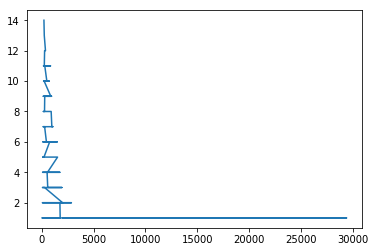

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(result)

In [24]:
c2 = []
with open('data/case_seg.txt', 'r', encoding='utf-8') as content :
    for texts_num, line in enumerate(content):
        line = line.strip('\n')
        a = line.split(" ")
        c2.append(len(a))
s = np.sum(c2)
print(s)

1728353
